In [1]:
import pandas as pd
import numpy as np
from qgrid import show_grid as exl

In [2]:
df = pd.read_csv('movies_metadata.csv')
df = df.loc[df.runtime>45]
df.head()

C:\Users\Brothers\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41974 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  41974 non-null  object 
 1   belongs_to_collection  4295 non-null   object 
 2   budget                 41974 non-null  object 
 3   genres                 41974 non-null  object 
 4   homepage               7428 non-null   object 
 5   id                     41974 non-null  object 
 6   imdb_id                41964 non-null  object 
 7   original_language      41967 non-null  object 
 8   original_title         41974 non-null  object 
 9   overview               41693 non-null  object 
 10  popularity             41974 non-null  object 
 11  poster_path            41786 non-null  object 
 12  production_companies   41974 non-null  object 
 13  production_countries   41974 non-null  object 
 14  release_date           41928 non-null  object 
 15  re

In [4]:
df.isna().sum()

adult                        0
belongs_to_collection    37679
budget                       0
genres                       0
homepage                 34546
id                           0
imdb_id                     10
original_language            7
original_title               0
overview                   281
popularity                   0
poster_path                188
production_companies         0
production_countries         0
release_date                46
revenue                      0
runtime                      0
spoken_languages             0
status                      55
tagline                  21920
title                        0
video                        0
vote_average                 0
vote_count                   0
dtype: int64

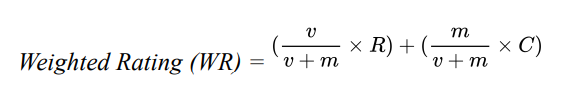

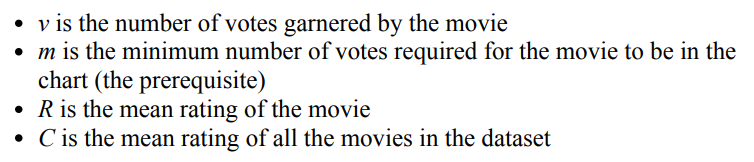

In [5]:
df.vote_count.describe()

count    41974.000000
mean       117.974484
std        510.353894
min          0.000000
25%          4.000000
50%         10.000000
75%         38.000000
max      14075.000000
Name: vote_count, dtype: float64

In [6]:
df.vote_count.apply(lambda x: np.log(x) if (x>0) else (0)).describe()

count    41974.000000
mean         2.593015
std          1.848521
min          0.000000
25%          1.386294
50%          2.302585
75%          3.637586
max          9.552155
Name: vote_count, dtype: float64

In [7]:
df['scaled_vote'] = df.vote_count.apply(lambda x: np.log(x) if (x>0) else (0))

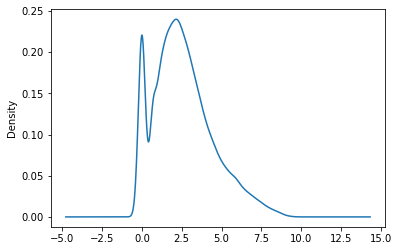

In [8]:
df.scaled_vote.plot.kde()

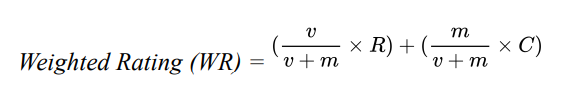

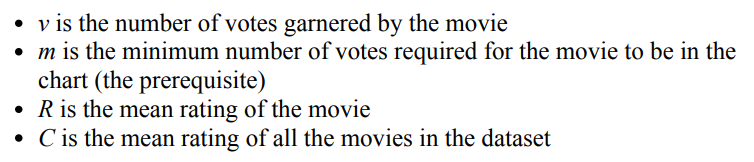

In [9]:
df.scaled_vote.quantile(0.8)

4.02535169073515

In [10]:
df.vote_count.quantile(0.8)

56.0

In [11]:
df.vote_average.mean()

5.6672916567396205

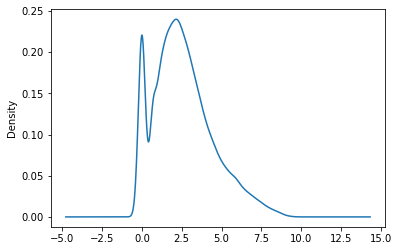

In [12]:
df.scaled_vote.plot.kde()

In [13]:
def create_score(x):
    v = x.vote_count
    m = 56.0
    R = x.vote_average
    C = 5.6672916567396205
    wr = ((v/(v+m)*R)+(m/(v+m))*C)
    return wr

In [14]:
df['score'] = df.apply(create_score, axis=1)

In [17]:
df.to_csv('cleaned.csv')

In [15]:
fdf = df.sort_values(by='score', ascending=False)[:250][['title', 'runtime', 'vote_count', 'scaled_vote' ,'score']]
exl(fdf)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [16]:
fdf

,title,runtime,vote_count,scaled_vote,score
10309,Dilwale Dulhania Le Jayenge,190.0,661.0,6.493754,8.831894
314,The Shawshank Redemption,142.0,8358.0,9.030974,8.481147
834,The Godfather,175.0,6024.0,8.703507,8.473909
40251,Your Name.,106.0,1030.0,6.937314,8.353930
12481,The Dark Knight,152.0,12269.0,9.414831,8.288038
...,...,...,...,...,...
17821,A Separation,123.0,474.0,6.161207,7.574657
23512,The Fault in Our Stars,125.0,3868.0,8.260493,7.572418
24445,Nightcrawler,117.0,3475.0,8.153350,7.569348
6947,Nausicaä of the Valley of the Wind,117.0,808.0,6.694562,7.568250
